In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [62]:
df = pd.read_csv("./data/193.csv", delimiter=";", quotechar="|", index_col="id")
df.shape

(5000, 19)

In [63]:
df

,title,price,rooms,bathrooms,size,parking_space,type,number,neighborhood_name,population,houses,area,street_name,zip_code,flood_quota,latitude,longitude,modality_name,company_name
id,,,,,,,,,,,,,,,,,,,
2,Casa à Venda em Blumenau no bairro Itoupava Norte,1500000.0,3,4,325.00,2,casa,136.0,Itoupava Norte,15648,5258,5.0,Rua Olga Krutzsch,89053-073,15.00,-26.878599,-49.079493,venda,portal_imoveis
3,Casa para Alugar em Blumenau no bairro Ponta A...,4200.0,5,3,245.65,2,casa,178.0,Ponta Aguda,9880,3233,7.0,Rua Venezuela,89050-310,NaN,-26.914422,-49.064223,locação,portal_imoveis
4,Casa à Venda em Blumenau no bairro Progresso,560000.0,3,2,822.26,1,casa,97.0,Progresso,15005,4852,7.0,Rua Germano Roeder,89026-250,NaN,-26.965439,-49.076319,venda,portal_imoveis
8,"Oportunidade! Apartamento 62,16m² Área PV abai...",111080.0,2,1,62.00,1,apartamento,NaN,Itoupava Central,28164,8715,45.0,Rua Professor Jacob Ineichen,89066-598,NaN,-26.842643,-49.111331,venda,zap_imoveis
9,Apartamento para Alugar em Blumenau no bairro ...,1300.0,2,1,95.22,1,apartamento,1758.0,Victor Konder,4612,1990,1.0,Rua Carlos Rischbieter,89012-200,16.60,-26.907743,-49.073207,locação,portal_imoveis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9685,"Cobertura com 3 dormitórios à venda, 259 m² po...",1100000.0,3,4,260.00,2,penthouse,NaN,Vorstadt,4269,1690,4.0,Rua Sao Bento,89015-300,19.25,-26.904420,-49.043170,venda,zap_imoveis
9686,"Terreno à venda, 776 m² por R$ 1.100.000,00 - ...",1100000.0,0,0,776.00,0,loteterreno,NaN,Itoupava Seca,4464,1616,3.0,Rua Otto Hennings,89030-040,14.90,-26.897091,-49.081495,venda,zap_imoveis
9688,Casa de alto padrão 382 m² por R$ 1.100.000 - ...,1100000.0,3,3,383.00,2,casa,NaN,Fortaleza,13196,4212,5.0,Rua Alberto Felicio Adriano,89055-050,15.40,-26.877373,-49.064536,venda,zap_imoveis


Normalizando tipos

In [64]:
def normalize_type(value):
    if value == "penthouse":
        return "apartamento"
    
    elif value == "flat":
        return "apartamento"

    elif value == "loft":
        return "apartamento"

    elif value == "sobrado":
        return "casa"

    elif value == "geminada":
        return "casa"
    
    elif value == "condominium":
        return "casa"
    
    elif value == "kitnet":
        return "casa"
    
    return value

df["main_type"] = df["type"].apply(normalize_type)

Convertendo cota de enchente

In [130]:
def convert_flood_quota(value):
    return 21 if pd.isna(value) else value

# Use the apply method with the custom function
df["flood_quota"] = df["flood_quota"].apply(convert_flood_quota)

Segurança

In [133]:
def check_security(value):
    if value < 8.13:
        return 1
    
    elif 8.14 < value < 9.15:
        return 2
    
    elif 9.16 < value < 12.6:
        return 3
    
    else:
        return 4

df["security"] = df["flood_quota"].apply(check_security)

Agrupando preços

In [135]:
df_venda = df[df["modality_name"] == "venda"]

In [66]:
df_venda['price_group'] = pd.qcut(df_venda['price'], q=30)

C:\Users\user\AppData\Local\Temp\ipykernel_23548\2465953288.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Agrupando tamanhos

In [67]:
df_venda['size_group'] = pd.qcut(df_venda['size'], q=20)

C:\Users\user\AppData\Local\Temp\ipykernel_23548\1875451635.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [136]:
properties = df_venda.loc[:, ["price", "rooms", "bathrooms", "size", "parking_space", "main_type", "neighborhood_name", "street_name", "zip_code", "security", "latitude", "longitude"]]
properties

,price,rooms,bathrooms,size,parking_space,main_type,neighborhood_name,street_name,zip_code,security,latitude,longitude
id,,,,,,,,,,,,
2,1500000.0,3,4,325.00,2,casa,Itoupava Norte,Rua Olga Krutzsch,89053-073,4,-26.878599,-49.079493
4,560000.0,3,2,822.26,1,casa,Progresso,Rua Germano Roeder,89026-250,4,-26.965439,-49.076319
8,111080.0,2,1,62.00,1,apartamento,Itoupava Central,Rua Professor Jacob Ineichen,89066-598,4,-26.842643,-49.111331
10,950000.0,3,4,259.50,2,casa,Itoupava Norte,Rua Xaverio Eble,89053-460,4,-26.871724,-49.077842
11,380000.0,4,2,150.00,1,apartamento,Vila Nova,Rua Theodoro Holtrup,89035-300,4,-26.909702,-49.082541
...,...,...,...,...,...,...,...,...,...,...,...,...
9685,1100000.0,3,4,260.00,2,apartamento,Vorstadt,Rua Sao Bento,89015-300,4,-26.904420,-49.043170
9686,1100000.0,0,0,776.00,0,loteterreno,Itoupava Seca,Rua Otto Hennings,89030-040,4,-26.897091,-49.081495
9688,1100000.0,3,3,383.00,2,casa,Fortaleza,Rua Alberto Felicio Adriano,89055-050,4,-26.877373,-49.064536


In [138]:
properties.describe()

,price,rooms,bathrooms,size,parking_space,security,latitude,longitude
count,4.819000e+03,4819.000000,4819.000000,4819.000000,4819.000000,4819.000000,4819.000000,4819.000000
mean,5.241347e+05,2.179913,1.828388,602.039326,1.452999,3.880473,-26.894976,-49.089910
std,2.922204e+05,1.277988,1.239407,7604.395979,1.102104,0.324441,0.036717,0.027922
min,1.100000e+05,0.000000,0.000000,0.000000,0.000000,3.000000,-27.299805,-49.628929
25%,3.219020e+05,2.000000,1.000000,75.000000,1.000000,4.000000,-26.914219,-49.102230
50%,4.600000e+05,2.000000,2.000000,116.000000,1.000000,4.000000,-26.901878,-49.087884
75%,6.800000e+05,3.000000,3.000000,222.465000,2.000000,4.000000,-26.877138,-49.073786
max,5.489000e+06,10.000000,10.000000,420000.000000,11.000000,4.000000,-26.641906,-48.597424


Quantidade de quartos

In [70]:
rooms_quantity = np.unique(properties["rooms"], return_counts=True)
bathrooms_quantity = np.unique(properties["bathrooms"], return_counts=True)
parking_spaces_quantity = np.unique(properties["parking_space"], return_counts=True)

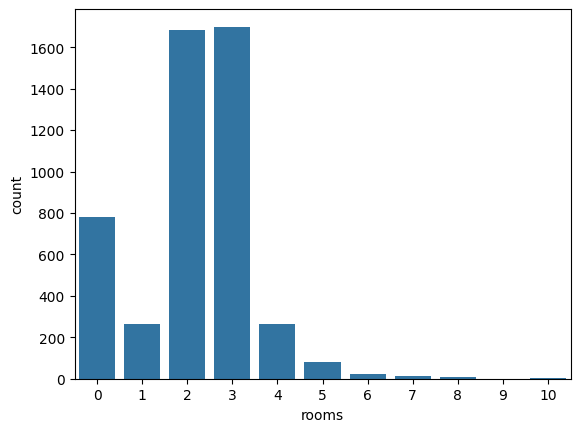

In [71]:
sns.countplot(x=properties["rooms"]);

Quantidade de banheiros

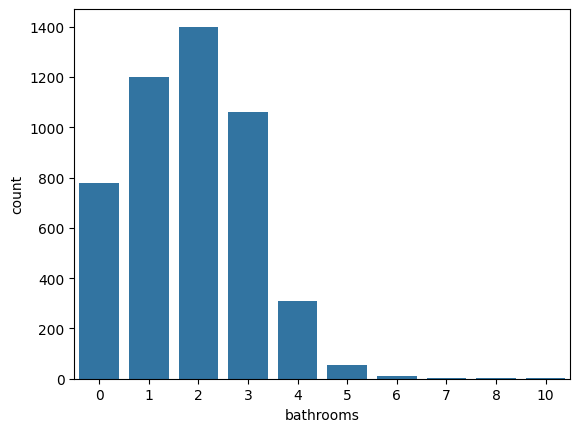

In [27]:
sns.countplot(x=properties["bathrooms"]);

Quantidade de vagas de estacionamento

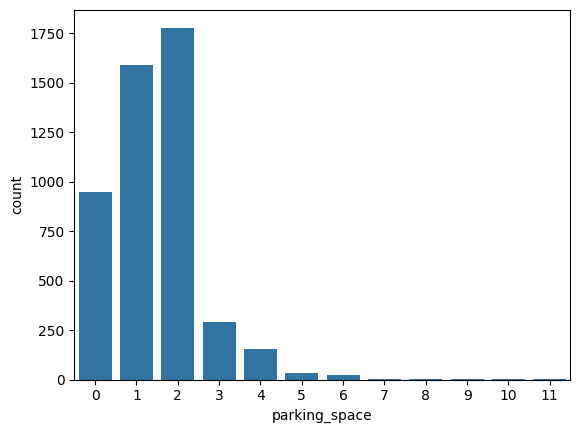

In [28]:
sns.countplot(x=properties["parking_space"]);

Grupo de tamanhos

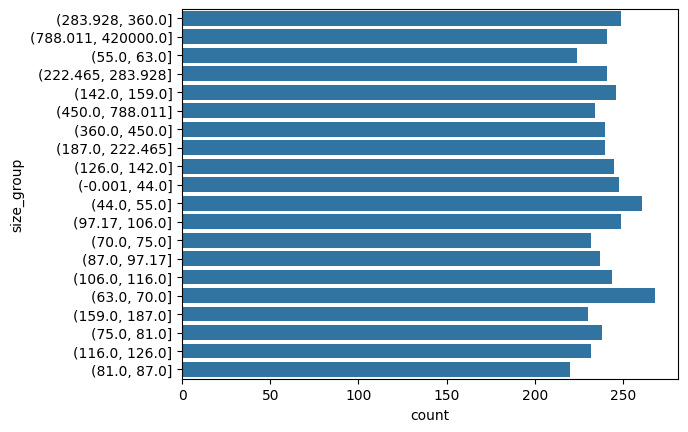

In [29]:
# sns.countplot(y=properties["size_group"], order=properties["size_group"]);

Grupo de preços

In [30]:
# sns.countplot(y=properties["price_group"], order=properties["price_group"]);

Grafico de dispersao do preço, tamanho e quantidade de quartos

In [72]:
grafico = px.scatter_matrix(properties, dimensions=["price", "rooms"], color="price")
grafico

In [32]:
grafico = px.treemap(properties, path=["main_type", "neighborhood_name"])
grafico

In [33]:
grafico = px.parallel_categories(properties, dimensions=["main_type", "parking_space"])
grafico

Separando variaveis

In [139]:
properties

,price,rooms,bathrooms,size,parking_space,main_type,neighborhood_name,street_name,zip_code,security,latitude,longitude
id,,,,,,,,,,,,
2,1500000.0,3,4,325.00,2,casa,Itoupava Norte,Rua Olga Krutzsch,89053-073,4,-26.878599,-49.079493
4,560000.0,3,2,822.26,1,casa,Progresso,Rua Germano Roeder,89026-250,4,-26.965439,-49.076319
8,111080.0,2,1,62.00,1,apartamento,Itoupava Central,Rua Professor Jacob Ineichen,89066-598,4,-26.842643,-49.111331
10,950000.0,3,4,259.50,2,casa,Itoupava Norte,Rua Xaverio Eble,89053-460,4,-26.871724,-49.077842
11,380000.0,4,2,150.00,1,apartamento,Vila Nova,Rua Theodoro Holtrup,89035-300,4,-26.909702,-49.082541
...,...,...,...,...,...,...,...,...,...,...,...,...
9685,1100000.0,3,4,260.00,2,apartamento,Vorstadt,Rua Sao Bento,89015-300,4,-26.904420,-49.043170
9686,1100000.0,0,0,776.00,0,loteterreno,Itoupava Seca,Rua Otto Hennings,89030-040,4,-26.897091,-49.081495
9688,1100000.0,3,3,383.00,2,casa,Fortaleza,Rua Alberto Felicio Adriano,89055-050,4,-26.877373,-49.064536


In [145]:
x_properties = properties.iloc[:, 1: 10]
x_properties

,rooms,bathrooms,size,parking_space,main_type,neighborhood_name,street_name,zip_code,security
id,,,,,,,,,
2,3,4,325.00,2,casa,Itoupava Norte,Rua Olga Krutzsch,89053-073,4
4,3,2,822.26,1,casa,Progresso,Rua Germano Roeder,89026-250,4
8,2,1,62.00,1,apartamento,Itoupava Central,Rua Professor Jacob Ineichen,89066-598,4
10,3,4,259.50,2,casa,Itoupava Norte,Rua Xaverio Eble,89053-460,4
11,4,2,150.00,1,apartamento,Vila Nova,Rua Theodoro Holtrup,89035-300,4
...,...,...,...,...,...,...,...,...,...
9685,3,4,260.00,2,apartamento,Vorstadt,Rua Sao Bento,89015-300,4
9686,0,0,776.00,0,loteterreno,Itoupava Seca,Rua Otto Hennings,89030-040,4
9688,3,3,383.00,2,casa,Fortaleza,Rua Alberto Felicio Adriano,89055-050,4


In [141]:
y_properties = properties.iloc[:,0]
y_properties

id
2       1500000.0
4        560000.0
8        111080.0
10       950000.0
11       380000.0
          ...    
9685    1100000.0
9686    1100000.0
9688    1100000.0
9689    1100000.0
9696    1100000.0
Name: price, Length: 4819, dtype: float64

Aplicando encoder

In [142]:
from sklearn.preprocessing import LabelEncoder

In [146]:
label_encoder_main_type = LabelEncoder()
label_encoder_neighborhood = LabelEncoder()
label_encoder_street_name = LabelEncoder()
label_encoder_zip_code = LabelEncoder()

# label_encoder_price_group = LabelEncoder()

In [147]:
# x_properties.iloc[:, 2] = label_encoder_size_group.fit_transform(x_properties.iloc[:, 2])
x_properties.iloc[:, 4] = label_encoder_main_type.fit_transform(x_properties.iloc[:, 4])
x_properties.iloc[:, 5] = label_encoder_neighborhood.fit_transform(x_properties.iloc[:, 5])
x_properties.iloc[:, 6] = label_encoder_street_name.fit_transform(x_properties.iloc[:, 6])
x_properties.iloc[:, 7] = label_encoder_zip_code.fit_transform(x_properties.iloc[:, 7])

In [40]:
# y_properties = label_encoder_price_group.fit_transform(y_properties)

In [157]:
temp = x_properties.copy(deep=True)
temp["price"] = y_properties
temp

,rooms,bathrooms,size,parking_space,main_type,neighborhood_name,street_name,zip_code,security,price
id,,,,,,,,,,
2,3,4,325.00,2,1,13,772,688,4,1500000.0
4,3,2,822.26,1,1,20,442,169,4,560000.0
8,2,1,62.00,1,0,12,852,927,4,111080.0
10,3,4,259.50,2,1,13,1054,713,4,950000.0
11,4,2,150.00,1,0,32,985,345,4,380000.0
...,...,...,...,...,...,...,...,...,...,...
9685,3,4,260.00,2,0,33,930,74,4,1100000.0
9686,0,0,776.00,0,2,14,792,204,4,1100000.0
9688,3,3,383.00,2,1,9,38,728,4,1100000.0


<Axes: title={'center': 'Correlation Matrix'}>

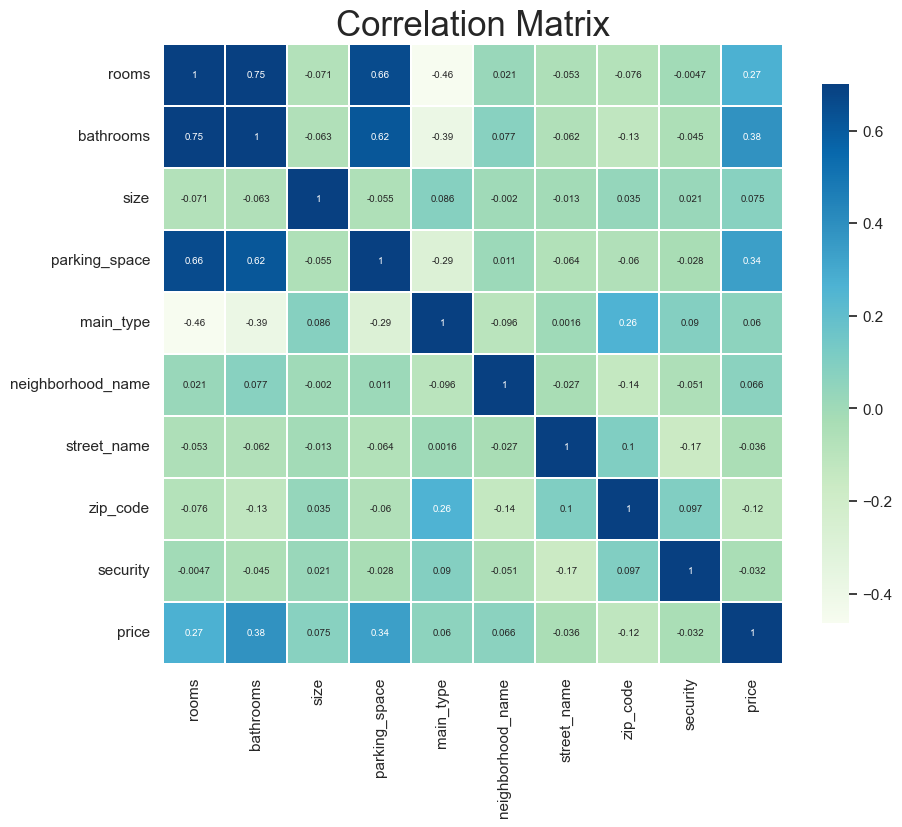

In [158]:
sns.set(style="whitegrid", font_scale=1)

plt.figure(figsize=(10,10))
plt.title('Correlation Matrix',fontsize=25)
sns.heatmap(temp.corr(),linewidths=0.25,vmax=0.7,square=True,cmap="GnBu",linecolor='w',
            annot=True, annot_kws={"size":7}, cbar_kws={"shrink": .7})

Onehot encoder

In [159]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [160]:
onehot_encoder_properties = ColumnTransformer(transformers=[("OneHot", OneHotEncoder(), [4,5,6,7])], remainder="passthrough")

In [161]:
hot_properties = onehot_encoder_properties.fit_transform(x_properties).toarray()

In [162]:
hot_properties.shape

(4819, 2154)

Padronização dos dados

In [163]:
from sklearn.preprocessing import StandardScaler

In [164]:
scaler_properties = StandardScaler()
x_scaler_properties = scaler_properties.fit_transform(hot_properties)

In [165]:
x_scaler_properties[0]

array([-0.8226525 ,  1.16517471, -0.45614932, ..., -0.03643525,
        0.49637616,  0.36844675])

Padronanização

In [96]:
from sklearn.preprocessing import Normalizer

In [97]:
normalized_properties = Normalizer()
x_normalized_properties = normalized_properties.fit_transform(hot_properties)

In [99]:
x_normalized_properties[0]

array([0.        , 0.00307647, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00307647, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00922941, 0.01230589, 0.99985329,
       0.00615294])

In [88]:
hot_properties[0]

array([  0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   3.,   4., 325.,   2.])

Separação das bases

- 75% da base para treino
- 25% para teste

In [166]:
from sklearn.model_selection import train_test_split

In [167]:
x_properties_train, x_properties_test, y_properties_train, y_properties_test = train_test_split(x_scaler_properties, y_properties, test_size=0.20, random_state=0)

In [168]:
x_properties_train.shape, x_properties_test.shape

((3855, 2154), (964, 2154))

In [169]:
y_properties_train.shape, y_properties_test.shape

((3855,), (964,))

Salvar base formatada

In [170]:
import pickle

In [171]:
with open("./data/complete_properties.pkl", mode="wb") as file:
    pickle.dump([x_properties_train, y_properties_train, x_properties_test, y_properties_test], file)

: 